# Imports e leitura do csv

In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

import io
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression
!pip install scikit-plot
import scikitplot as skplt

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier

In [2]:
#!pip install parameter-sherpa
from sklearn.model_selection import cross_val_score
import time
import sherpa
import sherpa.algorithms.bayesian_optimization as bayesian_optimization

%matplotlib inline

# Importing libraries used for reading csv from cloud
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Cloud authentication and getting file
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1u-Dp_ud44EW814B3WZgWpjt3W-jVdRpc"})
downloaded.GetContentFile('TRNcod.csv')

In [3]:
# Reading csv, dropping INDEX column and peeking at data
df = pd.read_csv('TRNcod.csv')

df = df.drop(columns = ['INDEX'])
print(df.shape)
df.head()

(389196, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,1,1,0,1,1,1,0,1
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,1,0,1,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,1,1,0,0,0,0,1,0,1,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,1,1,0,1,1,0,1,0,1,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,0,0,1,0,1,1,0


# Mixer de dados

In [4]:
#separando os dados da classe IND_BOM_1_1
dfClass1 = df[df['IND_BOM_1_1']==1]
print(dfClass1.shape)
dfClass1.head()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(255098, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
1,1,0,1,0,0,1,0,0.273504,1,0.111111,...,0,1,0,1,1,0,0,0,1,0
2,1,0,1,0,0,1,0,0.281910,0,1.000000,...,1,1,0,0,0,0,1,0,1,0
3,1,1,1,0,0,0,0,0.225741,0,0.111111,...,1,1,0,1,1,0,1,0,1,0
4,1,1,0,0,0,1,0,0.480403,0,0.111111,...,1,1,1,0,0,1,0,1,1,0
5,0,1,1,0,0,0,1,0.219323,0,0.111111,...,0,1,1,0,1,0,0,1,1,0


In [5]:
#separando os dados da classe IND_BOM_1_2
dfClass2 = df[df['IND_BOM_1_2']==1]
print(dfClass2.shape)
dfClass2.head()

(134098, 245)


,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,SEXO_1,NIVEL_RELACIONAMENTO_CREDITO01,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
0,1,1,1,0,0,0,0,0.135098,1,0.222222,...,0,0,1,1,0,1,1,1,0,1
10,1,0,1,1,0,0,0,0.654703,0,0.111111,...,0,1,0,1,0,0,0,0,0,1
11,1,1,1,0,0,0,0,0.097444,1,0.111111,...,0,1,0,1,0,1,0,1,0,1
12,1,0,1,0,1,0,0,0.398961,0,0.111111,...,1,1,1,0,1,0,0,0,0,1
17,1,1,1,0,0,0,0,0.142254,0,0.111111,...,1,0,0,1,0,1,0,1,0,1


In [6]:
#porcentagem de cada classe do DF
print(dfClass1.shape[0]/df.shape[0])
print(dfClass2.shape[0]/df.shape[0])

0.6554486685371895
0.34455133146281053


In [7]:
#dividindo o dataframe da classe 1 em 50% treinamento e 50% teste
from sklearn.model_selection import train_test_split
class1_train, class1_test = train_test_split(dfClass1, test_size = 0.5, random_state = 2)

print("class1_train shape: {}".format(class1_train.shape))
print("class1_test shape: {}".format(class1_test.shape))

class1_train shape: (127549, 245)
class1_test shape: (127549, 245)


In [8]:
#dividindo o dataframe de teste da classe 1 em 25% teste e 25% validação
class1_test, class1_validation = train_test_split(class1_test, test_size = 0.5, random_state =2)

print("class1_test shape: {}".format(class1_test.shape))
print("class1_validation shape: {}".format(class1_validation.shape))

class1_test shape: (63774, 245)
class1_validation shape: (63775, 245)


In [9]:
#repetindo as divisões para a classe 2
class2_train, class2_test = train_test_split(dfClass2, test_size = 0.5, random_state = 2)

print("class2_train shape: {}".format(class2_train.shape))
print("class2_test shape: {}".format(class2_test.shape))

class2_train shape: (67049, 245)
class2_test shape: (67049, 245)


In [10]:
class2_test, class2_validation = train_test_split(class2_test, test_size = 0.5, random_state = 2)

In [11]:
print(class2_test.shape)
print(class2_validation.shape)

(33524, 245)
(33525, 245)


In [12]:
#aumentando o dataframe de treinamento da classe minoritária para o dobro do seu tamanho utilizando de repetição
while (class2_train.shape[0] < class1_train.shape[0]):
    class2_train = class2_train.append(class2_train)

print(class2_train.shape)

(134098, 245)


In [13]:
#removendo dados excedentes
class2_train = class2_train.head(class1_train.shape[0])
print(class1_train.shape[0])
print(class2_train.shape[0])

127549
127549


In [14]:
#repetindo o processo para o dataframe de validação
while (class2_validation.shape[0] < class1_validation.shape[0]):
    class2_validation = class2_validation.append(class2_validation)

print(class2_validation.shape)

(67050, 245)


In [15]:
class2_validation = class2_validation.head(class1_validation.shape[0])
print(class1_validation.shape[0])
print(class2_validation.shape[0])

63775
63775


In [16]:
validation_X = class2_validation.append(class1_validation).sample(frac=1)
train_X = class2_train.append(class1_train).sample(frac=1)
test_X = class2_test.append(class1_test).sample(frac=1)

In [17]:
print(validation_X.shape[0])
print(train_X.shape[0])
print(test_X.shape[0])

127550
255098
97298


In [18]:
# Transformando IND_BOM_1_1 e IND_BOM_1_2 (que são mutualmente exclusivos em uma unica medida, BOM)
# BOM = 0 means IND_BOM_1_1 = 1
# BOM = 1 means IND_BOM_1_2 = 1

validation_Y = validation_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
validation_X = validation_X.drop(['IND_BOM_1_1'], axis=1)
validation_X = validation_X.drop(['IND_BOM_1_2'], axis=1)
validation_Y['BOM'] = validation_Y["IND_BOM_1_2"]
validation_Y = validation_Y.drop(['IND_BOM_1_1'], axis=1)
validation_Y = validation_Y.drop(['IND_BOM_1_2'], axis=1)

train_Y = train_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
train_X = train_X.drop(['IND_BOM_1_1'], axis=1)
train_X = train_X.drop(['IND_BOM_1_2'], axis=1)
train_Y['BOM'] = train_Y["IND_BOM_1_2"]
train_Y = train_Y.drop(['IND_BOM_1_1'], axis=1)
train_Y = train_Y.drop(['IND_BOM_1_2'], axis=1)

test_Y = test_X[["IND_BOM_1_1", "IND_BOM_1_2"]]
test_X = test_X.drop(['IND_BOM_1_1'], axis=1)
test_X = test_X.drop(['IND_BOM_1_2'], axis=1)
test_Y['BOM'] = test_Y["IND_BOM_1_2"]
test_Y = test_Y.drop(['IND_BOM_1_1'], axis=1)
test_Y = test_Y.drop(['IND_BOM_1_2'], axis=1)

# exemple:
validation_Y

,BOM
162872,1
330139,0
323308,1
352962,0
278115,1
...,...
79829,0
38707,0
49289,1
259068,1


In [19]:
# Funções para plotting e etc

def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

## MODELS

Random Forest com melhor trial

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 730


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


building tree 2 of 730
building tree 3 of 730
building tree 4 of 730
building tree 5 of 730
building tree 6 of 730
building tree 7 of 730
building tree 8 of 730
building tree 9 of 730
building tree 10 of 730
building tree 11 of 730
building tree 12 of 730
building tree 13 of 730
building tree 14 of 730
building tree 15 of 730
building tree 16 of 730
building tree 17 of 730
building tree 18 of 730
building tree 19 of 730
building tree 20 of 730
building tree 21 of 730
building tree 22 of 730
building tree 23 of 730
building tree 24 of 730
building tree 25 of 730
building tree 26 of 730
building tree 27 of 730
building tree 28 of 730
building tree 29 of 730
building tree 30 of 730
building tree 31 of 730
building tree 32 of 730
building tree 33 of 730
building tree 34 of 730
building tree 35 of 730
building tree 36 of 730
building tree 37 of 730
building tree 38 of 730
building tree 39 of 730
building tree 40 of 730
building tree 41 of 730
building tree 42 of 730
building tree 43 of 730


building tree 334 of 730
building tree 335 of 730
building tree 336 of 730
building tree 337 of 730
building tree 338 of 730
building tree 339 of 730
building tree 340 of 730
building tree 341 of 730
building tree 342 of 730
building tree 343 of 730
building tree 344 of 730
building tree 345 of 730
building tree 346 of 730
building tree 347 of 730
building tree 348 of 730
building tree 349 of 730
building tree 350 of 730
building tree 351 of 730
building tree 352 of 730
building tree 353 of 730
building tree 354 of 730
building tree 355 of 730
building tree 356 of 730
building tree 357 of 730
building tree 358 of 730
building tree 359 of 730
building tree 360 of 730
building tree 361 of 730
building tree 362 of 730
building tree 363 of 730
building tree 364 of 730
building tree 365 of 730
building tree 366 of 730
building tree 367 of 730
building tree 368 of 730
building tree 369 of 730
building tree 370 of 730
building tree 371 of 730
building tree 372 of 730
building tree 373 of 730


building tree 662 of 730
building tree 663 of 730
building tree 664 of 730
building tree 665 of 730
building tree 666 of 730
building tree 667 of 730
building tree 668 of 730
building tree 669 of 730
building tree 670 of 730
building tree 671 of 730
building tree 672 of 730
building tree 673 of 730
building tree 674 of 730
building tree 675 of 730
building tree 676 of 730
building tree 677 of 730
building tree 678 of 730
building tree 679 of 730
building tree 680 of 730
building tree 681 of 730
building tree 682 of 730
building tree 683 of 730
building tree 684 of 730
building tree 685 of 730
building tree 686 of 730
building tree 687 of 730
building tree 688 of 730
building tree 689 of 730
building tree 690 of 730
building tree 691 of 730
building tree 692 of 730
building tree 693 of 730
building tree 694 of 730
building tree 695 of 730
building tree 696 of 730
building tree 697 of 730
building tree 698 of 730
building tree 699 of 730
building tree 700 of 730
building tree 701 of 730


[Parallel(n_jobs=1)]: Done 730 out of 730 | elapsed: 162.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 730 out of 730 | elapsed:   32.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 730 out of 730 | elapsed:   32.3s finished


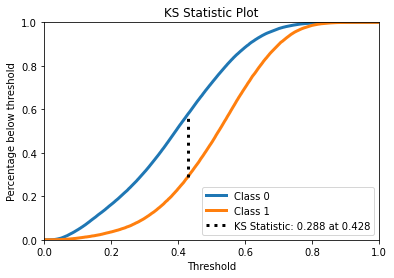


Accuracy:         0.6372
Recall:           0.5534
Precision:        0.6648
F1:               0.6040
AUROC:            0.6982
AUPR:             0.6747


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='gini',
                                 max_depth=33,
                                 min_samples_leaf=7,
                                 min_samples_split=9,
                                 max_features=0.4168128256712287,
                                 n_estimators=730,
                                verbose=2)
rf_clf.fit(train_X, train_Y)
rf_pred_class = rf_clf.predict(validation_X)
rf_pred_scores = rf_clf.predict_proba(validation_X)
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(validation_Y, rf_pred_class, rf_pred_scores)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [21]:
import pickle

# save
with open('model_RandomForest_Trial_2.pkl','wb') as f:
    pickle.dump(rf_clf,f)

In [22]:
rf_clf.save("randomForestSaveTrial2")

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

Random Forest tuning com Sherpa

{'Trial-ID': 2, 'Iteration': 1, 'criterion': 'gini', 'max_depth': 33, 'max_features': 0.4168128256712287, 'min_samples_leaf': 7, 'min_samples_split': 9, 'n_estimators': 730, 'Objective': 0.6369815758526068}